<a href="https://colab.research.google.com/github/StickMonkey615/JHCSMod4/blob/main/ANN%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [1]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/gdrive/')
# Import your dependencies
!pip install --upgrade xlrd > 1.2.0
import xlrd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import keras
!pip install keras-tuner --upgrade
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 41.5 MB/s 


In [2]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    raw_df = pd.read_excel(file_path)
    return raw_df

In [3]:
local_file_path = "breast-cancer.xls"

In [4]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [5]:
# Look at the different dataframe column headings
print(raw_data.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')


In [6]:
# Determine data types for each column
for i in range(0, len(raw_data.columns)):
    print(type(raw_data.values[1][i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
#Look at the range of values for each field
from collections import Counter
rng_vals=[]
for i in range(0,len(raw_data.columns)):
    rng_vals.append(Counter(raw_data.iloc[:,i].values))
    print(f"{raw_data.columns[i]}: {rng_vals[i]}")
del rng_vals, i

age: Counter({'50-59': 96, '40-49': 90, '60-69': 57, '30-39': 36, '70-79': 6, '20-29': 1})
menopause: Counter({'premeno': 150, 'ge40': 129, 'lt40': 7})
tumor-size: Counter({'30-34': 60, '25-29': 54, '20-24': 50, '15-19': 30, datetime.datetime(2014, 10, 1, 0, 0): 28, '40-44': 22, '35-39': 19, '0-4': 8, '50-54': 8, datetime.datetime(2019, 9, 5, 0, 0): 4, '45-49': 3})
inv-nodes: Counter({'0-2': 213, datetime.datetime(2019, 5, 3, 0, 0): 36, datetime.datetime(2019, 8, 6, 0, 0): 17, datetime.datetime(2019, 11, 9, 0, 0): 10, '15-17': 6, datetime.datetime(2014, 12, 1, 0, 0): 3, '24-26': 1})
node-caps: Counter({'no': 222, 'yes': 56, '?': 8})
deg-malig: Counter({2: 130, 3: 85, 1: 71})
breast: Counter({'left': 152, 'right': 134})
breast-quad: Counter({'left_low': 110, 'left_up': 97, 'right_up': 33, 'right_low': 24, 'central': 21, '?': 1})
irradiat: Counter({'no': 218, 'yes': 68})
Class: Counter({'no-recurrence-events': 201, 'recurrence-events': 85})


**All fields look to contain data that is catagorical in nature.**

**Some contain data that appears erroneous:**
 
*   **'tumor-size' and 'inv-nodes' appear to contain some data in a datetime format and some in string.**
*   **'node-caps' and 'breast-quad' contain Question Marks.**

**Need a way to address these erroneous data inputs.**



In [8]:
# Look in more detail at the columns with datetime data.
print(raw_data.iloc[:, 2].values)

['15-19' '15-19' '35-39' '35-39' '30-34' '25-29' '40-44'
 datetime.datetime(2014, 10, 1, 0, 0) '0-4' '40-44' '25-29' '15-19'
 '30-34' '25-29' '25-29' '20-24' datetime.datetime(2014, 10, 1, 0, 0)
 '15-19' '40-44' '20-24' '20-24' '40-44' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) datetime.datetime(2014, 10, 1, 0, 0)
 '30-34' '15-19' '30-34' '25-29' '25-29' '20-24' '30-34' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '45-49' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) '35-39' '35-39' '25-29' '20-24'
 '15-19' '30-34' datetime.datetime(2014, 10, 1, 0, 0) '35-39' '50-54'
 '40-44' '15-19' '30-34' '0-4' '40-44' '25-29' '25-29' '20-24' '35-39'
 '50-54' '0-4' '40-44' '30-34' '20-24' '30-34' '20-24' '15-19' '25-29'
 '15-19' '50-54' datetime.datetime(2014, 10, 1, 0, 0) '25-29' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '30-34' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '25-29' '25-29' '30-34'
 '15-19' '25-29' '30-34' '15-19'

In [9]:
# Look at output data
raw_data['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

Only 2 possible outputs, thus needs converting to binary format for use in classifier models.

In [10]:
# Check output balance
out = raw_data.iloc[:, -1].values
no_rows = len(raw_data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
code_rows = le.fit_transform(out)
print("True outputs: {:.2f} %".format(sum(code_rows)/len(raw_data)*100))
pos = sum(code_rows)
neg = len(raw_data)-sum(code_rows)
del out, no_rows, le, code_rows

True outputs: 29.72 %


Clear imbalance between output data. Some degree of bias/weighting/sampling will be required to ensure that results accurately predict outcomes for both True and False outcomes.

In [11]:
# Explain your key findings

**Data set is made up of 9 independent variables all of which appear catagorical in nature. Although stored as an integer, 'deg-malig' can be viewed as  catagorical data as it can only contain 3 discrete values.**

**The inclusion of datetime data entries in both the 'tumor-size' and 'inv-nodes' fields appears to be caused by a formatting entry within Excel. For example, '10-14' being input erroneously as 10/14 thus Excel has interpreted (and converted) it to the datetime field 01/10/2014. A function will need to be written within the model to convert these back to correct format.**

**How to deal with '?' entries in fields that are otherwise boolean poses an interesting dilemma. If these are infact meant to signify that the presence is unknown because no diagnostic work has been conducted, then this woiuld signify a valid dat entry. If it is however just an incomplete data entry then there is a risk its inclusion could skew the model results. Without knowing which it seems wisest to remove this data from the dataset. Removal of the entire field could well deprive the model of important information, thus just removing these specific entries (rows) appears the most sensible option, particularly noting that there are relatively few occurences.**

**Data set is imbalanced, with dependent variable outputs only True in 30% of instances. The model applied will require this imbalance to be taken into account so as not to sacrifice results predicting this smaller class (surely the aim of cancer diagnosis) so as to achieve a high accuracy figure.**

**Output variable will need converting into binary output for use with a binary classification model.**

Create any data pre-processing that you will conduct on seen and unseen data.  Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class.  You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [12]:
# Correct date types in 'tumor-size' and 'inv-nodes' variables
for i in range(0, len(raw_data)):
    if type(raw_data['tumor-size'][i]) is not str:
        if raw_data['tumor-size'][i].day == 1:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].month) +'-' + str(raw_data['tumor-size'][i].year-2000)
        else:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].day) + '-' + str(raw_data['tumor-size'][i].month)
    if type(raw_data['inv-nodes'][i]) is not str:
        if raw_data['inv-nodes'][i].day == 1:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].month) + '-' + str(raw_data['inv-nodes'][i].year-2000)
        else:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].day) + '-' + str(raw_data['inv-nodes'][i].month)        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Settin

In [13]:
# Remove all rows containing ? data
indx = raw_data[raw_data.isin(['?'])].stack(dropna=True).unstack().index
print(f"indx: {indx}")
raw_data = raw_data.drop(index=indx)

indx: Int64Index([20, 31, 50, 54, 71, 92, 149, 240, 264], dtype='int64')


In [14]:
# Split your data so that you can test the effectiveness of your model
# Split the data into a Training set and a Test set
dfs = np.split(raw_data, [len(raw_data.columns)-1], axis=1)
X = dfs[0]
y = dfs[1]

# Handle categorical values and drop dummy variable
# Remove non-categorical data
dm = X.pop('deg-malig')
# Encode the catagorical data (dummy variables)
proc_X = pd.get_dummies(data=X, prefix_sep='_', drop_first=True)
# Add back in non-categorical data
proc_X.insert(0, 'deg-malig', dm)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(proc_X, y, test_size = 0.25, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [15]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions

In [16]:
class Module4_Model:
    
    def __init__(self):
        self.model = None
        self.metrics = [
            keras.metrics.TruePositives(name='tp'),
            keras.metrics.FalsePositives(name='fp'),
            keras.metrics.TrueNegatives(name='tn'),
            keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='accuracy'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.Precision(name='precision'),
        ]
        self.EPOCHS = 500
        self.BATCH = 100
        self.THR = 0.3
        self.stop_crit = keras.callbacks.EarlyStopping(
            monitor='val_prc',
            verbose=1,
            patience=10,
            mode='max',
            restore_best_weights=True)

    def preprocess_training_data(self, training_df):
        """
        This function should process the training data and store any features
        required in the class
        """         
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(training_df)
        return processed_df, sc

    def preprocess_test_data(self, test_df):
        """
        This function should process the test data and store any features
        required in the class
        """
        # Apply feature scaling
        processed_df = self.scalar.transform(test_df)
        return processed_df

    def make_model(self,hp,output_bias=None):
        #msle = MeanSquaredLogarithmicError()
        model = keras.Sequential()

        if output_bias is not None:
            output_bias = keras.initializers.Constant(output_bias)
        # Tune the number of units in each layer
        hp_units1 = hp.Int('units1',min_value=32,max_value=512,step=32)
        hp_units2 = hp.Int('units2',min_value=32,max_value=512,step=32)
        hp_units3 = hp.Int('units3',min_value=32,max_value=512,step=32)

        #self.model = keras.Sequential()
        model.add(Dense(hp_units1,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(hp_units2,activation='relu'))
        model.add(Dense(hp_units3,activation='sigmoid',bias_initializer=output_bias))
        model.add(Dense(1,kernel_initializer='normal',activation='softmax'))
        hp_learning_rate = hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss=msle,
            metrics=self.metrics)
        
        return model


In [17]:
# Dont change
my_model = Module4_Model()

In [18]:
# Dont change
x_train_processed, my_model.scalar = my_model.preprocess_training_data(X_train)
x_val_processed = my_model.preprocess_test_data(X_val)

In [19]:
# Encode the output data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = pd.DataFrame(lb.fit_transform(y_train))
y_val = pd.DataFrame(lb.transform(y_val))
y_test = pd.DataFrame(lb.transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Create a model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ELU,PReLU,Dropout
from keras.losses import MeanSquaredLogarithmicError
msle = MeanSquaredLogarithmicError()

#classifier = Sequential()
#first hidden layer
#classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=31))
#second hidden layer
#classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
#classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [21]:
#classifier.summary()

In [22]:
#compiling the ANN
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#my_model.make_model(x_train_processed,np.log([pos/neg]))
#my_model.model.summary()

In [23]:
# Utilise HyperBand algorithm from keras tuner to construct model
tuner = kt.Hyperband(
    my_model.make_model,
    objective='val_loss',
    max_epochs=10,
    directory='keras_tuner_dir',
    project_name='keras_tuner'
)
tuner.search(x_train_processed,y_train,epochs=10,validation_split=0.2)

Trial 30 Complete [00h 00m 03s]
val_loss: 0.3057427406311035

Best val_loss So Far: 0.3057427406311035
Total elapsed time: 00h 01m 49s


In [24]:
# Dont change
x_test_processed = my_model.preprocess_test_data(X_test)

In [25]:
for h_param in [f"units{i}" for i in range(1,4)] + ['learning_rate']:
    print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

units1 64
units2 448
units3 256
learning_rate 0.0001


In [27]:
my_model.best_model = tuner.get_best_models()[0]
my_model.best_model.build(x_train_processed.shape)
my_model.best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (165, 64)                 2048      
                                                                 
 dropout (Dropout)           (165, 64)                 0         
                                                                 
 dense_1 (Dense)             (165, 448)                29120     
                                                                 
 dense_2 (Dense)             (165, 256)                114944    
                                                                 
 dense_3 (Dense)             (165, 1)                  257       
                                                                 
Total params: 146,369
Trainable params: 146,369
Non-trainable params: 0
_________________________________________________________________


In [28]:
my_model.best_model.fit(
    x_train_processed,
    y_train,
    epochs=10,
    batch_size=64
)

Epoch 1/10
3/3 [==============================] - 2s 7ms/step - loss: 0.3436 - tp: 59.0000 - fp: 139.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2980 - recall: 1.0000 - precision: 0.2980
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848
Epoch 6/10
3/3 [====

In [29]:
# Train your model
# Fitting the ANN to the training set
my_model.best_model.fit(x_train_processed,
                   y_train,
                   batch_size=my_model.BATCH,
                   epochs=my_model.EPOCHS,
                   callbacks=[my_model.stop_crit],
                   validation_data=(x_val_processed,y_val))

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 1s 740ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 59ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 32ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 32ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3699 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 51ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3123 - tp: 35.0000 - fp: 65.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3500 - recall: 1.0000 - precision: 0.3500

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 59ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2979 - tp: 38.0000 - fp: 62.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3800 - recall: 1.0000 - precision: 0.3800

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 32ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3699 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3748 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3699 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3075 - tp: 36.0000 - fp: 64.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3600 - recall: 1.0000 - precision: 0.3600

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 32ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 53ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 61ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 34ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 53ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 64ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3748 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 33ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3699 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 35ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 55ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 62ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3796 - tp: 21.0000 - fp: 79.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2100 - recall: 1.0000 - precision: 0.2100

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 61ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 65ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 58ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3844 - tp: 20.0000 - fp: 80.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2000 - recall: 1.0000 - precision: 0.2000

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3699 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 37ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3748 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 236/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3940 - tp: 18.0000 - fp: 82.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.1800 - recall: 1.0000 - precision: 0.1800

2/2 [==============================] - 0s 38ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 61ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3075 - tp: 36.0000 - fp: 64.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3600 - recall: 1.0000 - precision: 0.3600

2/2 [==============================] - 0s 39ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 51ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 56ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 50ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3748 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 55ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 50ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3699 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3699 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 50ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3748 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3844 - tp: 20.0000 - fp: 80.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2000 - recall: 1.0000 - precision: 0.2000

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 51ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 50ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 53ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 54ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 41ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 57ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 61ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 50ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 58ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 50ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 50ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 58ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 51ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 66ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3748 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 63ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 56ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3699 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 55ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 61ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 70ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3123 - tp: 35.0000 - fp: 65.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3500 - recall: 1.0000 - precision: 0.3500

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 57ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 55ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 64ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 53ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 53ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 51ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 55ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3075 - tp: 36.0000 - fp: 64.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3600 - recall: 1.0000 - precision: 0.3600

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 53ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 42ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3123 - tp: 35.0000 - fp: 65.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3500 - recall: 1.0000 - precision: 0.3500

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 60ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 53ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 64ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 63ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 52ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 51ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 49ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 48ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 47ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3603 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 55ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3267 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 45ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 51ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 43ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3315 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 46ms/step - loss: 0.3436 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571


In [30]:
# Run a prediction based on model on unseen data
y_pred = my_model.best_model.predict(x_test_processed,batch_size=my_model.BATCH)
#convert values
y_pred = (y_pred>my_model.THR)

In [31]:
# Calculate class weights
weight_0 = (1 / neg) * ((pos + neg) / 2)
weight_1 = (1 / pos) * ((pos + neg) / 2)
class_weight = {0: weight_0, 1: weight_1}
print(f"Weight for 0: {weight_0}")
print(f"Weight for 1: {weight_1}")

Weight for 0: 0.7114427860696517
Weight for 1: 1.6823529411764706


In [33]:
# Train a new model with class weights
my_model.best_model.fit(x_train_processed,
                   y_train,
                   batch_size=my_model.BATCH,
                   epochs=my_model.EPOCHS,
                   callbacks=[my_model.stop_crit],
                   validation_data=(x_val_processed,y_val),
                   class_weight=class_weight)

Epoch 1/500
1/2 [==============>...............] - ETA: 1s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 1s 67ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 31ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 33ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 33ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 56ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2222 - tp: 35.0000 - fp: 65.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3500 - recall: 1.0000 - precision: 0.3500

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 32ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2700 - tp: 21.0000 - fp: 79.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2100 - recall: 1.0000 - precision: 0.2100

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 33ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 33ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 32ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 67ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 33ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 33ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2735 - tp: 20.0000 - fp: 80.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2000 - recall: 1.0000 - precision: 0.2000

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 34ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 33ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 33ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2700 - tp: 21.0000 - fp: 79.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2100 - recall: 1.0000 - precision: 0.2100

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 35ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 36ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 61ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 65ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 236/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 68ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 60ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 72ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 40ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2188 - tp: 36.0000 - fp: 64.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3600 - recall: 1.0000 - precision: 0.3600

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 39ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 37ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2735 - tp: 20.0000 - fp: 80.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2000 - recall: 1.0000 - precision: 0.2000

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 41ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 56ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 59ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 38ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 58ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2222 - tp: 35.0000 - fp: 65.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3500 - recall: 1.0000 - precision: 0.3500

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 60ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 60ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 67ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2188 - tp: 36.0000 - fp: 64.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3600 - recall: 1.0000 - precision: 0.3600

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 56ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2700 - tp: 21.0000 - fp: 79.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2100 - recall: 1.0000 - precision: 0.2100

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 24.0000 - fp: 76.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2400 - recall: 1.0000 - precision: 0.2400

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 43ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 59ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 54ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2700 - tp: 21.0000 - fp: 79.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2100 - recall: 1.0000 - precision: 0.2100

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 58ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 56ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2700 - tp: 21.0000 - fp: 79.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2100 - recall: 1.0000 - precision: 0.2100

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 58ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 42ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 23.0000 - fp: 77.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2300 - recall: 1.0000 - precision: 0.2300

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2256 - tp: 34.0000 - fp: 66.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3400 - recall: 1.0000 - precision: 0.3400

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 65ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2290 - tp: 33.0000 - fp: 67.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3300 - recall: 1.0000 - precision: 0.3300

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 44ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 31.0000 - fp: 69.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3100 - recall: 1.0000 - precision: 0.3100

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 54ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 50ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 66ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 58ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 22.0000 - fp: 78.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2200 - recall: 1.0000 - precision: 0.2200

2/2 [==============================] - 0s 46ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2393 - tp: 30.0000 - fp: 70.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3000 - recall: 1.0000 - precision: 0.3000

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2564 - tp: 25.0000 - fp: 75.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2500 - recall: 1.0000 - precision: 0.2500

2/2 [==============================] - 0s 47ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 45ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2427 - tp: 29.0000 - fp: 71.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2900 - recall: 1.0000 - precision: 0.2900

2/2 [==============================] - 0s 49ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 48ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2324 - tp: 32.0000 - fp: 68.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.3200 - recall: 1.0000 - precision: 0.3200

2/2 [==============================] - 0s 55ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2495 - tp: 27.0000 - fp: 73.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2700 - recall: 1.0000 - precision: 0.2700

2/2 [==============================] - 0s 51ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - tp: 26.0000 - fp: 74.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2600 - recall: 1.0000 - precision: 0.2600

2/2 [==============================] - 0s 52ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 28.0000 - fp: 72.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2800 - recall: 1.0000 - precision: 0.2800

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 47.0000 - fp: 118.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.2848 - recall: 1.0000 - precision: 0.2848 - val_loss: 0.3089 - val_tp: 15.0000 - val_fp: 27.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.3571 - val_recall: 1.0000 - val_precision: 0.3571


In [34]:
# use your model to make a prediction on unseen data
y_pred = my_model.best_model.predict(x_test_processed,batch_size=my_model.BATCH)
#convert values
y_pred = (y_pred>my_model.THR)

Accuracy: 27.14 %
Weighted ROC AUC accuracy: 50.00 %
Confusion matrix:


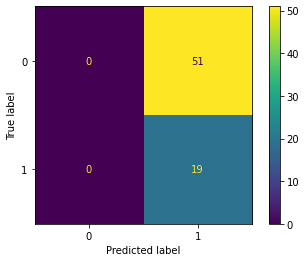

In [35]:
# Asssess the accuracy of your model and explain your key findings
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(score*100))
print("Weighted ROC AUC accuracy: {:.2f} %".format(roc_auc_score(y_test, y_pred, average='weighted')*100))
print("Confusion matrix:")
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Apply k-fold Cross Validation
# from sklearn.model_selection import cross_val_score
# from numpy import ravel
# accuracies = cross_val_score(estimator = classifier, X = x_train_processed, y = ravel(y_train.values), scoring = 'roc_auc_ovo', cv = 10)
# print("K-fold cross validation results")
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Visualise the loss and accuracy for each epoch

In [ ]:
# list all data in history
print(my_model.model.history.keys())
# summarize history for accuracy
plt.plot(my_model.model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(my_model.model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model is approx 65-70% accurate at predicting whether cancer recurrence will occur.**

**Crucially, the proportion of False Negatives is low (<15%). In cancer diagnosis these are the outcomes that we want to minimise. False Positives, whilst undesirable, will likely lead to further diagnostic testing before it is realised that cancer is not present.**

### Unit tests:

###Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [ ]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [ ]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)